## Kinetic energy of fastest moving ejecta - ejecta velocity plot

In [14]:
import pandas as pd
import numpy as np

In [15]:
all_data=pd.read_csv("Ek_vs_beta_vals.csv")
all_data

,Unnamed: 0,Name,beta,Lorentz factor,Gamma_beta,Energy,Type,Relativicity,Ref
0,0,SN 2008D,NaN,NaN,0.25,1.00E+48,SNe,Non-rel,"Soderberg,2008"
1,1,SN 2007gr,0.2,NaN,0.2041241452,2.00E+46,SNe,Non-rel,"Soderberg,2010b"
2,2,SN2003L,0.2,NaN,0.2041241452,1.00E+48,SNe,Non-rel,"Soderberg, 2005"
3,3,SN2012au,0.2,NaN,0.2041241452,1.00E+47,SNe,Non-rel,"Kamble, 2013"
4,4,SN2012ap,0.7,NaN,0.9801960588,1.60E+49,SNe,Non-rel,"Chakroborti, 2014"
...,...,...,...,...,...,...,...,...,...
178,31,ASKAP J0055-2558_c30,NaN,NaN,0.332952136543988,1.482e+51/2.865e+50/1.704e+52,ASKAP J0055-2558_c30,Non-rel,This work
179,32,ASKAP J0055-2558_c30,NaN,NaN,0.3315559610025016,1.496e+51/2.891e+50/1.719e+52,ASKAP J0055-2558_c30,Non-rel,This work
180,33,ASKAP J0055-2558_c30,NaN,NaN,0.3140895776078765,1.476e+51/2.854e+50/1.697e+52,ASKAP J0055-2558_c30,Non-rel,This work
181,34,ASKAP J0055-2558_c30,NaN,NaN,0.2985549759870685,1.430e+51/2.765e+50/1.644e+52,ASKAP J0055-2558_c30,Non-rel,This work


In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Define your custom styles
plot_style = {
    'GRBs':                     {'marker': 'o', 'alpha': 1, 'size': 70, 'zorder': 1, 'color': "tab:blue"},
    'Sub-E GRBs':               {'marker': 'o', 'alpha': 1, 'size': 70, 'zorder': 2, 'color': "lightblue"},
    'SNe':                      {'marker': 'o', 'alpha': 1, 'size': 70, 'zorder': 1, 'color': "dimgrey"},
    'LLAGN':                      {'marker': '^', 'alpha': 1, 'size': 90, 'zorder': 1, 'color': "purple"},
    'TDEs (jetted)':            {'marker': 's', 'alpha': 1, 'size': 60, 'zorder': 7, 'color': "darkgreen"},
    'TDEs':                     {'marker': 's', 'alpha': 1, 'size': 60, 'zorder': 7, 'color': "yellowgreen"},
    'Delayed TDEs':             {'marker': 's', 'alpha': 1, 'size': 60, 'zorder': 7, 'color': "darkseagreen"},
    'FBOTs':                    {'marker': 'D', 'alpha': 1, 'size': 60, 'zorder': 50, 'color': "black"},
    'ASKAP J0055-2558_sph': {'marker': '*', 'alpha': 1, 'size': 300, 'zorder': 100, 'color': "peru"},
    'ASKAP J0055-2558_c15': {'marker': '*', 'alpha': 1, 'size': 300, 'zorder': 100, 'color': "gold"},
    'ASKAP J0055-2558_c30': {'marker': '*', 'alpha': 1, 'size': 300, 'zorder': 100, 'color': "orange"},
    'ASKAP J0055-2558_c5': {'marker': '*', 'alpha': 1, 'size': 300, 'zorder': 100, 'color': "red"},
    "OA": {'marker': '*', 'alpha': 1, 'size': 250, 'zorder': 100,'color':"black"}
 }
special_types_with_boxes = [] 

def plot_energy_vs_gamma_beta(all_data):
    # fig = plt.figure(figsize=(6.5, 7))
    fig = plt.figure(figsize=(8, 7))
    ax = plt.gca()

    used_labels = set()

    for (obj_name, obj_type), group in all_data.groupby(['Name', 'Type']):
        style = plot_style.get(obj_type, {'marker': 'o', 'alpha': 0.7, 'size': 30, 'zorder': 1, 'color': 'gray'})

        gamma_beta_list = []
        energy_list = []

        for idx, row in group.iterrows():
            gamma_beta_raw = str(row['Gamma_beta'])
            energy_raw = str(row['Energy'])

            if obj_type in special_types_with_boxes:
                # Special case: draw dashed rectangle
                gamma_beta_low, gamma_beta_high = parse_range(gamma_beta_raw)
                energy_low, energy_high = parse_range(energy_raw)

                width = gamma_beta_high - gamma_beta_low
                height = energy_high - energy_low

                rect = mpatches.Rectangle(
                    (gamma_beta_low, energy_low),
                    width, height,
                    linewidth=1,
                    linestyle='-',  # Dashed rectangle
                    edgecolor=style['color'],
                    facecolor='none',
                    zorder=style['zorder']
                )
                ax.add_patch(rect)

            else:
                gamma_beta_val, gamma_beta_err_low, gamma_beta_err_high = parse_value_with_errors(gamma_beta_raw)
                energy_val, energy_err_low, energy_err_high = parse_value_with_errors(energy_raw)

                gamma_beta_list.append(gamma_beta_val)
                energy_list.append(energy_val)

                gamma_beta_arrow = None
                energy_arrow = None
                if '<' in gamma_beta_raw:
                    gamma_beta_arrow = 'left'
                elif '>' in gamma_beta_raw:
                    gamma_beta_arrow = 'right'
                if '<' in energy_raw:
                    energy_arrow = 'down'
                elif '>' in energy_raw:
                    energy_arrow = 'up'

                if gamma_beta_arrow is None and energy_arrow is None:
                    xerr = np.array([
                        [abs(gamma_beta_val - gamma_beta_err_low)],
                        [abs(gamma_beta_err_high - gamma_beta_val)]
                    ])
                    yerr = np.array([
                        [abs(energy_val - energy_err_low)],
                        [abs(energy_err_high - energy_val)]
                    ])

                    # Draw errorbars without marker
                    ax.errorbar(
                        gamma_beta_val, energy_val,
                        xerr=xerr,
                        yerr=yerr,
                        fmt='none',  # no marker at center
                        ecolor=style['color'],
                        elinewidth=1.5,
                        capsize=3,
                        alpha=style['alpha'],
                        zorder=style['zorder'] 
                    )

                    # Now separately scatter the point
                    ax.scatter(
                        gamma_beta_val, energy_val,
                        marker=style['marker'],
                        color=style['color'],
                        s=style['size'],
                        alpha=style['alpha'],
                        label=obj_type if obj_type not in used_labels else None,
                        zorder=style['zorder'],
                        edgecolor="black"
                    )

                else:
                    # Just scatter + big arrow for limits
                    ax.scatter(
                        gamma_beta_val, energy_val,
                        marker=style['marker'],
                        color=style['color'],
                        s=style['size'],
                        alpha=style['alpha'],
                        label=obj_type if obj_type not in used_labels else None,
                        zorder=style['zorder'],
                        edgecolor="black"
                    )

                    # Draw bigger arrows
                    arrow_dx = 0.4 * gamma_beta_val  # Make arrow longer (40% of x)
                    arrow_dy = 2 * energy_val  # Arrow longer (70% of y)

                    if gamma_beta_arrow:
                        if gamma_beta_arrow == 'left':
                            ax.annotate('', xy=(gamma_beta_val - arrow_dx, energy_val), xytext=(gamma_beta_val, energy_val),
                                        arrowprops=dict(arrowstyle="->", color=style['color'], lw=2))
                        else:
                            ax.annotate('', xy=(gamma_beta_val + arrow_dx, energy_val), xytext=(gamma_beta_val, energy_val),
                                        arrowprops=dict(arrowstyle="->", color=style['color'], lw=2))

                    if energy_arrow:
                        if energy_arrow == 'down':
                            ax.annotate('', xy=(gamma_beta_val, energy_val - arrow_dy), xytext=(gamma_beta_val, energy_val),
                                        arrowprops=dict(arrowstyle="->", color=style['color'], lw=2))
                        else:
                            ax.annotate('', xy=(gamma_beta_val, energy_val + arrow_dy), xytext=(gamma_beta_val, energy_val),
                                        arrowprops=dict(arrowstyle="->", color=style['color'], lw=2))

            used_labels.add(obj_type)

        # After plotting all points for one object, connect them
        if len(gamma_beta_list) >= 2:
            gamma_beta_list, energy_list = zip(*sorted(zip(gamma_beta_list, energy_list)))
            ax.plot(
                gamma_beta_list, energy_list,
                color=style['color'],
                lw=1.5,
                alpha=style['alpha'],
                zorder=style['zorder'] - 2  # Line below scatter
            )

    # Draw vertical line at Gamma_beta = 1
    ax.axvline(x=1, color='black', linestyle='--', linewidth=2, zorder=0)
    
    ax.errorbar(
        1e-2, 1e53,
        yerr=[[1e53 - 1e52], [1e54 - 1e53]],
        marker='*',
        alpha=1,
        markersize=15,
        zorder=100,
        color="grey",
        linewidth=0,  # remove line
        elinewidth=1.5,
        capsize=3
        )
    ax.text(0.26, 0.95, r"$\mathrm{low}\;\epsilon_e,$" r"$\mathrm{high}\;\epsilon_B$",
        transform=ax.transAxes,  # Coordinate relative to axes
        va='top', ha='center', fontsize=10, color='black')
    ax.text(0.26, 0.82, r"$\mathrm{high}\;\epsilon_e,$" r"$\mathrm{low}\;\epsilon_B$",
            transform=ax.transAxes,  # Coordinate relative to axes
            va='top', ha='center', fontsize=10, color='black')
    ax.text(0.26, 0.70, r"$\epsilon_e \approx \epsilon_B$",
            transform=ax.transAxes,  # Coordinate relative to axes
            va='top', ha='right', fontsize=10, color='black')

#     # Add labels for non-relativistic and relativistic regimes
    ax.text(0.05,0.05,r"Non-relativistic",horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,color="black",fontsize="12",fontweight="bold")
    ax.text(0.75,0.05,r"Relativistic",horizontalalignment='left',verticalalignment='center', transform=ax.transAxes,color="black",fontsize="12",fontweight="bold")


   # Build the legend with colored markers instead of colored squares
    from matplotlib.lines import Line2D

    label_order = [
        'ASKAP J0055-2558_sph', 'ASKAP J0055-2558_c30',
        'ASKAP J0055-2558_c15', 'ASKAP J0055-2558_c5',
        'GRBs', 'Sub-E GRBs', 'SNe', 'FBOTs', 'OA',
        'TDEs (jetted)', 'TDEs', 'Delayed TDEs', 'LLAGN',
    ]

    handles = [
        Line2D(
            [], [], 
            marker=plot_style[label]['marker'],
            color='white',  # no line connecting the points
            markerfacecolor=plot_style[label]['color'],
            markeredgecolor='white',
            markersize=12,
            label=label
        )
        for label in label_order
        if label in used_labels  # only if label actually appeared in the plot
    ]

    ax.legend(
        handles=handles,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.1),
        ncol=4,
        frameon=False,
        fontsize=11,
        handletextpad=0.5,
        columnspacing=1.5
    )

    
    # Set log scales
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlabel(r'$\Gamma \beta$', fontsize=16)
    ax.set_ylabel(r'Kinetic Energy (erg)', fontsize=16)

    ax.tick_params(axis='both', colors='black', direction='in', length=7, width=1, labelsize="large")
    ax.tick_params(axis='both', which="minor", colors='black', direction='in', length=5, width=1)

    ax.set_yscale('log')

    from matplotlib.ticker import LogLocator
    ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=10))
    ax.yaxis.set_minor_formatter(plt.NullFormatter())

    ax.tick_params(axis='y', which='both', direction='in', length=5, width=1)
    ax.tick_params(axis='both', which="major", colors='black', direction='in', length=7, width=1)


    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    plt.tight_layout()
    # plt.show()
    return fig

def parse_value_with_errors(value_str):
    value_str = value_str.strip()
    if '/' in value_str:
        parts = value_str.split('/')
        if len(parts)==2:
            center = float(parts[0])
            err_low = float(parts[1])
            err_u = float(parts[1])
        else:
            center = float(parts[0])
            err_low = float(parts[1])
            err_u = float(parts[2])
        return center, err_low, err_u
    elif '<' in value_str:
        val = float(value_str.replace('<', '').strip())
        return val, val * 0.5, val
    elif '>' in value_str:
        val = float(value_str.replace('>', '').strip())
        return val, val, val * 1.5
    else:
        val = float(value_str)
        return val, val, val

def parse_range(value_str):
    value_str = value_str.strip()
    if '-' in value_str:
        low, high = value_str.split('-')
        return float(low), float(high)
    else:
        raise ValueError(f"Expected a range with '-' but got {value_str}") 


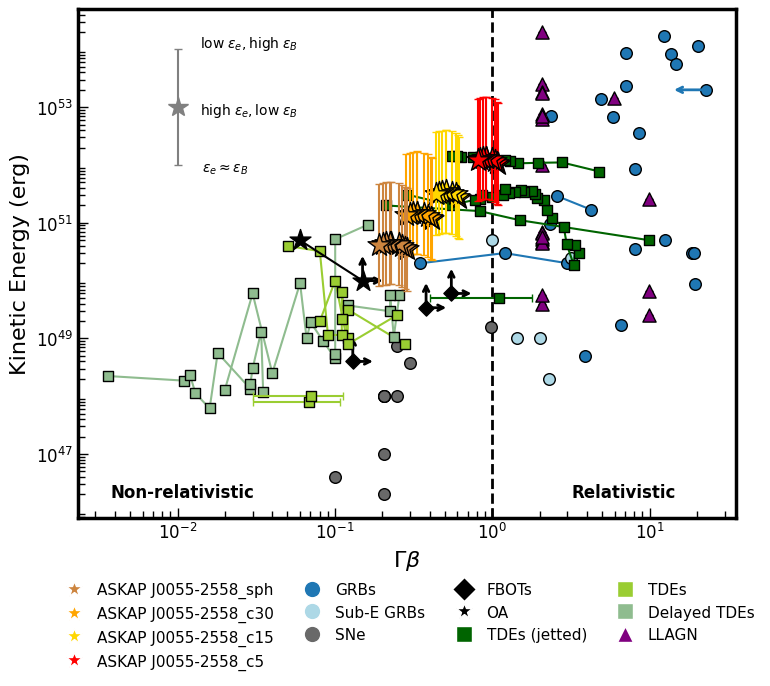

In [17]:
fig=plot_energy_vs_gamma_beta(all_data)